# What's new in This Version

1. Input parts are seperated from the rest of the code
2. There were some major problems with the calculations in the code. They are fixed.
3. The arrangement of the data in the heatmap and the axis labels are fixed.
4. Calculates the average of MSE within each square.
5. Calculates the Total average of MSE.

# Read From File

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#=====================================================================================================
#=============================================INPUTS==================================================
#=====================================================================================================
# import arduino_file and detection_file
arduino_file = open("newIdealPoints.txt", "r")
detection_file = open("outputPoints.txt", "r")
    
# A manual subset of the values
till = 98
#=====================================================================================================
#=====================================================================================================
#=====================================================================================================


# Define the two lists with x and y values
arduino_values = []
for x in arduino_file:
    point = x.split(",")
    arduino_values.append(point)

arduino_values = np.asarray(arduino_values[0][:till], dtype='float64')


detected_values = []
for x in detection_file:
    point = x.split(",")
    detected_values.append(point)

detected_values = np.asarray(detected_values[0][:till], dtype='float64')


x_arduino = np.array(arduino_values[::2])
y_arduino = np.array(arduino_values[1::2])
x_detection = np.array(detected_values[::2])
y_detection = np.array(detected_values[1::2])

# MSE Calculator
### For testing single instances

In [111]:
x1 = 71
y1 = 25
x2 = 73.31033856511068
y2 = 26.29127231383496

mse = np.sqrt((x1-x2)**2 + (y1-y2)**2)
print(mse)

2.646705210996189


# Heatmap Using MSE

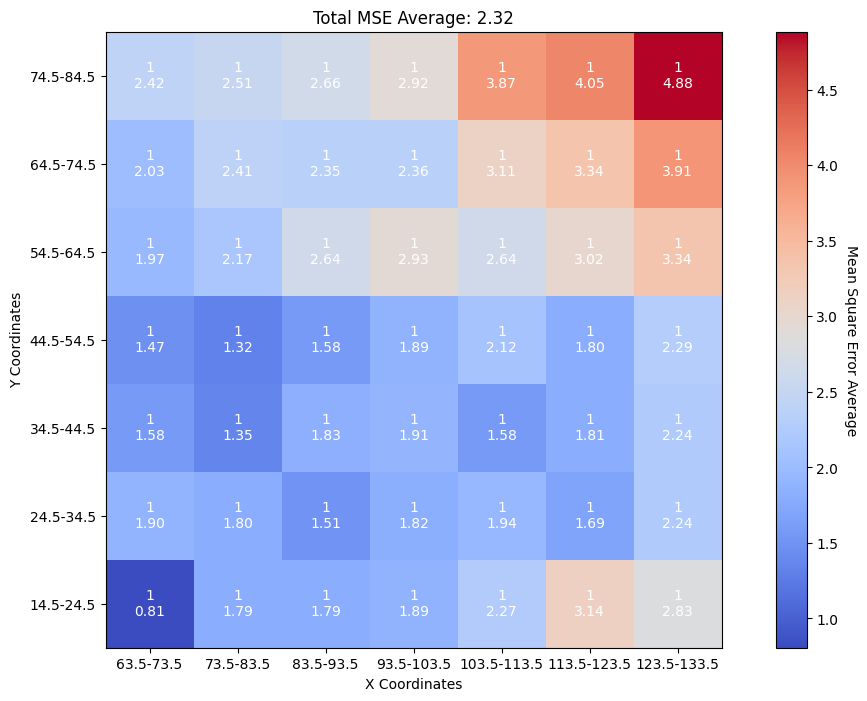

In [7]:
#=====================================================================================================
# Set random values for arduino and detection (for test only)
# x_arduino = np.random.randint(0, 10, size=(100,))
# y_arduino = np.random.randint(0, 10, size=(100,))
# x_detection = np.random.randint(0, 10, size=(100,))
# y_detection = np.random.randint(0, 10, size=(100,))
#=====================================================================================================


#=====================================================================================================
#=============================================INPUTS==================================================
#=====================================================================================================
# Define the number of squares in each dimension
num_squares = 7

# Divide the x and y coordinates into equal squares

## using automatic min and max of arduino values
# x_bins = np.linspace(np.amin(x_arduino), np.amax(x_arduino), num_squares+1)
# y_bins = np.linspace(np.amin(y_arduino), np.amax(y_arduino), num_squares+1)

## using manual min and max of arduino values
x_bins = np.linspace(63.5, 133.5, num_squares+1)
y_bins = np.linspace(14.5, 84.5, num_squares+1)

#=====================================================================================================
#=====================================================================================================
#=====================================================================================================

mse = []
# Calculate the mean square error between x and y coordinates
for it in range(till//2):
    mse.append(np.sqrt((x_arduino[it]-x_detection[it])**2 + (y_arduino[it]-y_detection[it])**2))

# Compute the number of data points and mean square error in each square
n_points = np.zeros((num_squares, num_squares))
mse_sum = np.zeros((num_squares, num_squares))
data_within_square_arduino = [[] for _ in range(num_squares * num_squares)]
data_within_square_detection = [[] for _ in range(num_squares * num_squares)]

for i in range(num_squares):
    for j in range(num_squares):
        x_mask = np.logical_and(x_arduino >= x_bins[i], x_arduino < x_bins[i+1])
        y_mask = np.logical_and(y_arduino >= y_bins[j], y_arduino < y_bins[j+1])
        mask = np.logical_and(x_mask, y_mask)
        n_points[i,j] = np.sum(mask)
        mse_sum[i,j] = np.sum(np.sqrt(np.sum((np.column_stack((x_arduino, y_arduino))[mask]-np.column_stack((x_detection, y_detection))[mask])**2, axis = 1)))
        data_within_square_arduino[i*num_squares + j] = np.column_stack((x_arduino, y_arduino))[mask]
        data_within_square_detection[i*num_squares + j] = np.column_stack((x_detection, y_detection))[mask]
        
        mse_temp = []
        for k in range(int(n_points[i,j])):
            mse_temp.append(np.sqrt((data_within_square_arduino[i*num_squares + j] - data_within_square_detection[i*num_squares + j])**2))

# MSE average within each square 
mse_avg = mse_sum / n_points

# Total MSE average
total_mse_avg = np.sum(mse_avg) / (num_squares**2)

# Plot the 2D heat map
fig, ax = plt.subplots(figsize=(14, 8)) # figsize = (14, 8) can change the size of the figure
im = ax.imshow(np.transpose(np.fliplr(np.flipud(mse_avg[::-1, ::]))), cmap="coolwarm")


# Add the number of data points and mean square error to each square
for j in range(num_squares-1, -1, -1):
    for i in range(num_squares):
        text = ax.text(i, j, f"{n_points[i,num_squares-j-1]:.0f}\n{mse_avg[i,num_squares-j-1]:.2f}",
                       ha="center", va="center", color="w", fontsize=10)

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Mean Square Error Average", rotation=-90, va="bottom")

# Set axis labels and title
ax.set_xticks(np.arange(num_squares))
ax.set_yticks(np.arange(num_squares))
ax.set_xticklabels([f"{x_bins[i]:.1f}-{x_bins[i+1]:.1f}" for i in range(num_squares)])
ax.set_yticklabels([f"{y_bins[i]:.1f}-{y_bins[i+1]:.1f}" for i in range(num_squares-1, -1, -1)])
ax.set_xlabel("X Coordinates")
ax.set_ylabel("Y Coordinates")
ax.set_title(f"Total MSE Average: {total_mse_avg:.2f}")

# Show the plot
plt.show()


# Error

In [137]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the x and y coordinates
# x_arduino = np.random.randint(0, 10, size=(100,))
# y_arduino = np.random.randint(0, 10, size=(100,))
# x_detection = np.random.randint(0, 10, size=(100,))
# y_detection = np.random.randint(0, 10, size=(100,))

# # Calculate the absolute error between x and y coordinates
# error = np.mean(np.abs(np.column_stack((x_arduino, y_arduino)) - np.column_stack((x_detection, y_detection))))

# # Define the number of squares in each dimension
# num_squares = 6

# # Divide the x and y coordinates into equal squares
# x_bins = np.linspace(0, 10, num_squares+1)
# y_bins = np.linspace(0, 10, num_squares+1)

# # Compute the number of data points and error in each square
# n_points = np.zeros((num_squares, num_squares))
# error_sum = np.zeros((num_squares, num_squares))
# for i in range(num_squares):
#     for j in range(num_squares):
#         x_mask = np.logical_and(x_arduino >= x_bins[i], x_arduino < x_bins[i+1])
#         y_mask = np.logical_and(y_arduino >= y_bins[j], y_arduino < y_bins[j+1])
#         mask = np.logical_and(x_mask, y_mask)
#         n_points[i,j] = np.sum(mask)
#         error_sum[i,j] = np.sum(np.abs(np.column_stack((x_arduino, y_arduino))[mask] - np.column_stack((x_detection, y_detection))[mask]))

# # Plot the 2D heat map
# fig, ax = plt.subplots()
# im = ax.imshow(error_sum, cmap="coolwarm")

# # Add the number of data points and error to each square
# for i in range(num_squares):
#     for j in range(num_squares):
#         text = ax.text(j, i, f"{n_points[i,j]:.0f}\n{error_sum[i,j]/n_points[i,j]:.2f}",
#                        ha="center", va="center", color="w", fontsize=10)

# # Add color bar
# cbar = ax.figure.colorbar(im, ax=ax)
# cbar.ax.set_ylabel("Error Sum", rotation=-90, va="bottom")

# # Set axis labels and title
# ax.set_xticks(np.arange(num_squares))
# ax.set_yticks(np.arange(num_squares))
# ax.set_xticklabels([f"{x_bins[i]:.1f}-{x_bins[i+1]:.1f}" for i in range(num_squares)])
# ax.set_yticklabels([f"{y_bins[i]:.1f}-{y_bins[i+1]:.1f}" for i in range(num_squares)])
# ax.set_xlabel("X Coordinates")
# ax.set_ylabel("Y Coordinates")
# ax.set_title(f"Error: {error:.2f}")

# # Show the plot
# plt.show()

# abs MSE

In [138]:
# import numpy as np
# import matplotlib.pyplot as plt

# def mse(y_true, y_pred):
#     mse = np.abs(y_true - y_pred)
#     return mse

# # Create sample data
# # x_arduino = np.random.randint(0, 10, size=(100,))
# # y_arduino = np.random.randint(0, 10, size=(100,))
# # x_detection = np.random.randint(0, 10, size=(100,))
# # y_detection = np.random.randint(0, 10, size=(100,))

# # Calculate mean absolute error
# x_mse = mse(x_arduino, x_detection)
# y_mse = mse(y_arduino, y_detection)
# zdata = x_mse + y_mse

# # Divide the figure to 16 equal squares
# xbins = np.linspace(np.amin(x_arduino), np.amax(x_arduino), num_squares+1)
# ybins = np.linspace(np.amin(y_arduino), np.amax(y_arduino), num_squares+1)


# # Count the number of data points in each square and sum the errors
# z, xedges, yedges = np.histogram2d(x_arduino, y_arduino, bins=[xbins, ybins], weights=zdata)

# # Create heatmap
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.clf()
# plt.imshow(z.T, extent=extent, origin='lower', cmap='coolwarm')
# plt.colorbar()
# plt.show()